# EDA

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import re


from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore") 

# for plotly in jupyter notebook
import plotly.io as pio
pio.renderers.default='notebook'

# for plotly in jupyter lab
# import plotly.io as pio
# pio.renderers.default = "iframe"

In [4]:
df = pd.read_csv('review_dataset.csv')
# df['rating_value'] = df['rating_value'] - 1
df

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта"
0,МТС Банк,Person,user-68627692462,Тестовый отзыв,Отзыв размещенное в Народном рейтинге письменн...,08/02/2023 16:36,441,0,3,3,3,3,3
1,Россельхозбанк,Person,user-430412136020,Открытие счета ИП,Добрый день! Я являюсь ИП и стоял перед выборо...,05/02/2023 14:36,773,0,5,3,3,3,3
2,Россельхозбанк,Person,user-60268947545,Спасибо за помощь,Здравствуйте! Достаточно давно являюсь клиенто...,04/02/2023 07:28,560,0,5,3,3,3,3
3,Банк ДОМ.РФ,Person,user-294212759595,Отличный сервис,"Здравствуйте,являюсь клиентом банка с ноября 2...",03/02/2023 08:15,737,1,5,3,3,3,3
4,Альфа-Банк,Person,user-841712733484,Блокировка денежных средств,14 января 2023 года была попытка перевода дене...,01/02/2023 23:49,627,3,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12394,Совкомбанк,Person,user-882711916217,Скорая помощь,Здравствуйте.Хочу выразить свою благодарность ...,11/11/2022 00:42,969,2,5,3,3,3,3
12395,Кредит Европа Банк,Person,user-86968728439,Прислали смс,Вчера моей маме тоже пришла смс от вашего имен...,11/11/2022 00:23,888,2,1,NaN,NaN,NaN,NaN
12396,Совкомбанк,Person,user-915611915816,Акция 0-0-24 На товар дня! Не присылают промок...,"Покупали в рассрочку в Эльдорадо (ТЦ Водный), ...",11/11/2022 00:08,1058,3,1,2,2,2,2
12397,ЮниКредит Банк,Person,user-60989234575,Прекрасное обслуживание в ДО Пятницкая,8 ноября я обратилась в ДО Пятницкая к сотрудн...,10/11/2022 23:47,1231,0,5,3,3,3,3


после всех преобразований осталось 10793

Посмотрим на наличие дубликатов в датасете

In [5]:
df.drop_duplicates(subset=['review'])

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта"
0,МТС Банк,Person,user-68627692462,Тестовый отзыв,Отзыв размещенное в Народном рейтинге письменн...,08/02/2023 16:36,441,0,3,3,3,3,3
1,Россельхозбанк,Person,user-430412136020,Открытие счета ИП,Добрый день! Я являюсь ИП и стоял перед выборо...,05/02/2023 14:36,773,0,5,3,3,3,3
2,Россельхозбанк,Person,user-60268947545,Спасибо за помощь,Здравствуйте! Достаточно давно являюсь клиенто...,04/02/2023 07:28,560,0,5,3,3,3,3
3,Банк ДОМ.РФ,Person,user-294212759595,Отличный сервис,"Здравствуйте,являюсь клиентом банка с ноября 2...",03/02/2023 08:15,737,1,5,3,3,3,3
4,Альфа-Банк,Person,user-841712733484,Блокировка денежных средств,14 января 2023 года была попытка перевода дене...,01/02/2023 23:49,627,3,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12394,Совкомбанк,Person,user-882711916217,Скорая помощь,Здравствуйте.Хочу выразить свою благодарность ...,11/11/2022 00:42,969,2,5,3,3,3,3
12395,Кредит Европа Банк,Person,user-86968728439,Прислали смс,Вчера моей маме тоже пришла смс от вашего имен...,11/11/2022 00:23,888,2,1,NaN,NaN,NaN,NaN
12396,Совкомбанк,Person,user-915611915816,Акция 0-0-24 На товар дня! Не присылают промок...,"Покупали в рассрочку в Эльдорадо (ТЦ Водный), ...",11/11/2022 00:08,1058,3,1,2,2,2,2
12397,ЮниКредит Банк,Person,user-60989234575,Прекрасное обслуживание в ДО Пятницкая,8 ноября я обратилась в ДО Пятницкая к сотрудн...,10/11/2022 23:47,1231,0,5,3,3,3,3


Они есть и их всего 4 штуки, поэтому удалим их

In [6]:
df.drop_duplicates(subset=['review'], inplace=True, ignore_index=True)

Посмотрим на датасет

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12395 entries, 0 to 12394
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   bank                        12395 non-null  object
 1   type                        12395 non-null  object
 2   user_name                   12364 non-null  object
 3   review_title                12390 non-null  object
 4   review                      12394 non-null  object
 5   review_dttm                 12395 non-null  object
 6   review_views                12395 non-null  object
 7   review_comments             12395 non-null  object
 8   rating_value                12394 non-null  object
 9   Вежливые сотрудники         11380 non-null  object
 10  Доступность и поддержка     11380 non-null  object
 11  Прозрачные условия          11380 non-null  object
 12  Удобство приложения, сайта  11380 non-null  object
dtypes: object(13)
memory usage: 1.2+ MB


Видно, что в некоторых полях есть пустые значения. Посмотрим на них

In [8]:
df[(df['review'].isna()) | (df['user_name'].isna()) | (df['review_title'].isna()) | (df['rating_value'].isna())]

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта"
5,Банк «Открытие»,Person,NaN,Хамство сотрудников Открытия,"У меня сложилось устойчивое впечатление, что в...",01/02/2023 22:38,517,31,1,1,1,1,1
58,Банк ТКБ,Person,NaN,Несанкционированная блокировка счета и денежны...,В начале декабря 2022 года решила стать клиент...,31/01/2023 19:03,941,1,1,2,2,2,2
61,bank,type,user_name,NaN,NaN,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта"
176,Газпромбанк,Person,NaN,Газпромбанк - скрытые комиссии за перевод в др...,"В ноябре-декабре 2022 года стал замечать, что ...",30/01/2023 13:53,1003,4,1,2,2,2,2
227,МТС Банк,Person,NaN,Не начислили кэшбэк,Длительное время являюсь клиентом МТС-банка. В...,29/01/2023 19:42,668,2,1,2,2,2,2
553,Газпромбанк,Person,user4467164,Не связывайтесь! Ужасный банк!,"Если рассказывать все, то можно поэму написать...",24/01/2023 13:35,2511,2,NaN,1,1,1,1
970,МТС Банк,Person,NaN,Невозможно перевести деньги,В приложении МТС банка после оформления новой ...,16/01/2023 00:01,1610,0,1,3,3,3,3
1536,Банки.ру,Person,NaN,Банк не желает отключать от СБП,Добрый день. в 2022 году открывал счёт в данно...,08/01/2023 20:07,4174,6,1,1,1,1,1
1663,Почта Банк,Person,NaN,Неправильный график на сайте,Обратился 05.01.23 в отделение по адресу Москв...,05/01/2023 20:35,3747,5,1,NaN,NaN,NaN,NaN
1664,Почта Банк,Person,NaN,Нет средств в банкомате,Обратился 05.01.23 в отделение по адресу бульв...,05/01/2023 20:11,3582,4,1,NaN,NaN,NaN,NaN


Видно, что отзывы с пустым user_name не являются плохими, так как сам текст и оценка присутствует. С пустыми значениями review_title аналогично. А вот с пустой оценкой и пустым отзывом - проблема. Их удалим

In [9]:
df = df[(~df['review'].isna())].reset_index(drop=True)
df = df[(~df['rating_value'].isna())].reset_index(drop=True)

Для дополнительных категорий оценки пустых значений порядка тысячи, но они в задаче пока никак не используются, поэтому я их оставлю

Теперь посмотрим на рзличные статистики

In [10]:
df.describe()

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта"
count,12393,12393,12362,12389,12393,12393,12393,12393,12393,11378,11378,11378,11378
unique,86,1,11448,10159,12393,11283,2441,37,5,3,3,3,3
top,Тинькофф Банк,Person,bambinito,Благодарность,Отзыв размещенное в Народном рейтинге письменн...,12/12/2022 16:04,1100,0,1,3,3,3,3
freq,1551,12393,42,347,1,4,30,4141,5749,6390,6390,6390,6390


Достаточно много неуникальных заголовков надо проверить

In [11]:
df[(df.duplicated(subset=['review_title'])) & (~df['review_title'].isna())].sort_values(by=['review_title'])

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта"
10463,Хоум Кредит Банк,Person,irinka16111983,120 дней без процентов,Просто волшебная карта и приложение! Получила ...,19/11/2022 22:23,1190,4,1,3,3,3,3
7141,Совкомбанк,Person,user-78137544243,Автокредит,"Брали 2 года назад машину в кредит, сотрудник ...",05/12/2022 21:52,938,2,5,3,3,3,3
6261,Совкомбанк,Person,user-608012227539,Автокредит,В Совкомбанке оформлял автокредит.Все условия ...,09/12/2022 10:08,750,0,5,3,3,3,3
2411,Хоум Кредит Банк,Person,user-420212389169,Акции,"Позвонила сегодня в контактный центр в 15 34, ...",28/12/2022 15:47,1312,5,5,3,3,3,3
5446,Альфа-Банк,Person,user-480711839474,Акция,Решил поучавствовать в акции 1000 за первую по...,12/12/2022 20:11,919,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9310,Хоум Кредит Банк,Person,user-831711940237,Что это было?,"Здравствуйте, сегодня обнаружила, что баланс к...",25/11/2022 10:07,1624,2,5,NaN,NaN,NaN,NaN
10233,Альфа-Банк,Person,user9906573,Чудесный банк,"Всем здравствуйте, хочу высказаться по поводу ...",21/11/2022 14:32,1212,0,1,1,1,1,1
6033,Хоум Кредит Банк,Person,user-597610426453,Это лучший банк!,"Это лучший банк! Я очень рада ,что являюсь кли...",09/12/2022 19:11,955,5,5,3,3,3,3
7086,ВТБ,Person,user-46889299613,г Москва,03.12.22 в 15.35 совершила звонок по номеру 10...,06/12/2022 10:16,901,4,1,2,2,2,2


На самом деле просто используются повторяющиеся заголовки

In [12]:
df['review_dttm'].min()

'01/01/2023 01:47'

In [13]:
df['review_dttm'].max()

'31/12/2022 23:19'

In [14]:
df = df[df['review_dttm'] != 'review_dttm']

In [15]:
df['review_dttm'].max()

'31/12/2022 23:19'

Преобразуем форматы полей

In [16]:
df['review_dttm'] = pd.to_datetime(df['review_dttm'], format="mixed")
# , format="mixed"

In [17]:
df['review_dttm'] = df['review_dttm'].dt.date

In [18]:
df.dtypes

bank                          object
type                          object
user_name                     object
review_title                  object
review                        object
review_dttm                   object
review_views                  object
review_comments               object
rating_value                  object
Вежливые сотрудники           object
Доступность и поддержка       object
Прозрачные условия            object
Удобство приложения, сайта    object
dtype: object

In [19]:
df = df.astype({'review_views': 'int32', 'review_comments': 'int32', 'rating_value': 'int32'}, copy=False)

In [20]:
df['review_dttm'].min()

datetime.date(2022, 1, 12)

Отзывы достаточно актуальные

Увидел тестовый отзыв, удалю его

In [21]:
df[df['review_title'] == 'Тестовый отзыв']

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта"
0,МТС Банк,Person,user-68627692462,Тестовый отзыв,Отзыв размещенное в Народном рейтинге письменн...,2023-08-02,441,0,3,3,3,3,3


In [22]:
df = df[df['review_title'] != 'Тестовый отзыв']

Посмотрим на распределение отзывов по длине

In [23]:
for index, row in df.iterrows():
    df.loc[index, 'review_len'] = len(re.sub('[^А-Яа-яёЁ0-9]', ' ', row['review']).split())

In [ ]:
fig = px.histogram(df, x='review_len')
fig.update_xaxes(labelalias='review length')
fig.show()

In [ ]:
print(f'Процент отзывов с длиной > 512 слов = {df[df["review_len"] > 512].review.count() / df.review.count() * 100}')

Посмотрим на самые короткие и длинные отзывы, возможно это выбросы

In [ ]:
pd.options.display.max_colwidth = 500
df[df['review_len'] < 30][['review', 'review_len']].sort_values(by='review_len')

С короткими все хорошо

In [ ]:
pd.options.display.max_colwidth = 50000
df[df['review_len'] > 700]['review']

In [ ]:
# [['review', 'review_len']].sort_values(by='review_len')
df[(df['review_len'] > 600) & (df['review_len'] < 700)]['review']

374                            Добрый день. Полезный отзыв для Юр.лиц ИП. Потребовалась КЭП, но для этого нужно было лично посетить Налоговую 46, а это не близко и не очень удобно добираться для меня. Стал искать альтернативу и нашел сразу 2 банка дают такую возможность, один из них Сбер. Отлично подумал! На сайте Сбера и акцию для как раз для новых клиентов, суть проста получаешь бесплатно токен, оформляешь счет и все готово за 20 мин при посещении офиса - звучит красиво на деле как всегда. Все дело в мелочах. 1. Офис банка не любой, а только специальные, по сравнению с сетью их явно не много. Зайдя в любой офис, мне не смогли подсказать их адреса и как посмотреть, это считаю недоработкой банка. Для тех, кто хочет понять какие это офисы на сайте, есть раздел оформить КЭП и инструкция и есть выбрать офис и тогда вы сможете увидеть их. Время работы с 9-18 только по будням тоже не прям удобно для клиентов. 2. 24.01.22 при визите в одно из крупных двухэтажных офисов, проблемы уже начались

С длинными отзывами я тоже проблем не вижу, просто очень подробный отзыв

In [ ]:
pd.options.display.max_colwidth = 50

Но в модель будут подаваться токены и ограничения стоит именно на них, поэтому токенизируем отзывы и посмотрим на распределение длины отзыва в токенах. Токенайзер буду использовать как для обучения BERT модели

In [31]:
import torch
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny-sentiment-balanced')
len(tokenizer.convert_ids_to_tokens(tokenizer(df.loc[2, 'review'])['input_ids']))

for index, row in df.iterrows():
    df.loc[index, 'review_len_in_tokens'] = len(tokenizer.convert_ids_to_tokens(
        tokenizer(df.loc[index, 'review'])['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (1205 > 512). Running this sequence through the model will result in indexing errors


In [32]:
fig = px.histogram(df, x='review_len_in_tokens')
fig.update_xaxes(labelalias='review length in tokens')
fig.show()

In [33]:
print(f'Процент отзывов с длиной в токенах> 512 слов = {df[df["review_len_in_tokens"] > 512].review.count() / df.review.count() * 100}')

Процент отзывов с длиной в токенах> 512 слов = 14.977404777275662


Посмотрим на распредление отзывов по оценкам

In [34]:
fig = px.histogram(df, x='rating_value')
fig.update_layout(bargap=0.2)
fig.show()

Видим, что распределение по классам далеко не равномерное. Большинство оценок распределено по значениям 1 и 5. Попробуем учесть это в построении модели и сравнить результаты

Посмотрим на распределение отзывов по дополнительным категориям

In [35]:
df

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта",review_len,review_len_in_tokens
1,Россельхозбанк,Person,user-430412136020,Открытие счета ИП,Добрый день! Я являюсь ИП и стоял перед выборо...,2023-05-02,773,0,5,3,3,3,3,171.0,363.0
2,Россельхозбанк,Person,user-60268947545,Спасибо за помощь,Здравствуйте! Достаточно давно являюсь клиенто...,2023-04-02,560,0,5,3,3,3,3,66.0,149.0
3,Банк ДОМ.РФ,Person,user-294212759595,Отличный сервис,"Здравствуйте,являюсь клиентом банка с ноября 2...",2023-03-02,737,1,5,3,3,3,3,70.0,164.0
4,Альфа-Банк,Person,user-841712733484,Блокировка денежных средств,14 января 2023 года была попытка перевода дене...,2023-01-02,627,3,1,NaN,NaN,NaN,NaN,170.0,337.0
5,Банк «Открытие»,Person,NaN,Хамство сотрудников Открытия,"У меня сложилось устойчивое впечатление, что в...",2023-01-02,517,31,1,1,1,1,1,106.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12388,Совкомбанк,Person,user-882711916217,Скорая помощь,Здравствуйте.Хочу выразить свою благодарность ...,2022-11-11,969,2,5,3,3,3,3,184.0,347.0
12389,Кредит Европа Банк,Person,user-86968728439,Прислали смс,Вчера моей маме тоже пришла смс от вашего имен...,2022-11-11,888,2,1,NaN,NaN,NaN,NaN,86.0,183.0
12390,Совкомбанк,Person,user-915611915816,Акция 0-0-24 На товар дня! Не присылают промок...,"Покупали в рассрочку в Эльдорадо (ТЦ Водный), ...",2022-11-11,1058,3,1,2,2,2,2,127.0,276.0
12391,ЮниКредит Банк,Person,user-60989234575,Прекрасное обслуживание в ДО Пятницкая,8 ноября я обратилась в ДО Пятницкая к сотрудн...,2022-10-11,1231,0,5,3,3,3,3,62.0,137.0


In [36]:
columns = ['Вежливые сотрудники', 'Доступность и поддержка', 'Прозрачные условия', 'Удобство приложения, сайта']
for column in columns:
    fig = px.histogram(df.sort_values(column), x=column)
    fig.update_layout(bargap=0.2)
    fig.show()

In [37]:
fig = px.histogram(df.sort_values('Доступность и поддержка'), x='Доступность и поддержка')
fig.update_layout(bargap=0.2)
fig.show()

In [38]:
df[(df['Доступность и поддержка'] != df['Вежливые сотрудники']) & (~df['Вежливые сотрудники'].isna())]

,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта",review_len,review_len_in_tokens


Посмотрим на распределение отзывов по банкам

In [39]:
df.bank.unique()

array(['Россельхозбанк', 'Банк ДОМ.РФ', 'Альфа-Банк', 'Банк «Открытие»',
       'ВТБ', 'Росбанк', 'Локо-Банк', 'Газпромбанк', 'Совкомбанк',
       'Сбербанк', 'Хоум Кредит Банк', 'Банки.ру', 'Банк ТКБ',
       'Русский Стандарт', 'Ренессанс Банк', 'Почта Банк', 'ОТП Банк',
       'Кредит Европа Банк', 'Драйв Клик Банк', 'Ак Барс Банк', 'Пойдём!',
       'МТС Банк', 'Тинькофф Банк', 'Райффайзен Банк', 'ЮMoney',
       'Уралсиб', 'Московский кредитный банк (МКБ)', 'Банк Синара',
       'МИнБанк', 'Промсвязьбанк', 'Еком Банк',
       'Уральский банк реконструкции и развития (УБРиР)', 'Абсолют Банк',
       'КИВИ Банк', 'Челиндбанк', 'Газэнергобанк', 'Модульбанк',
       'ЮниКредит Банк', 'РостФинанс', 'Банк ЗЕНИТ', 'Точка',
       'РЕСО Кредит', 'РНКБ', 'Юнистрим', 'Икано Банк', 'МОСОБЛБАНК',
       'Азиатско-Тихоокеанский банк (АТБ)', 'Банк «Санкт-Петербург»',
       'СМП Банк', 'Банк «РОССИЯ»', 'Энерготрансбанк', 'Фора-Банк',
       'Банк «Центр-инвест»', 'Банк Жилищного Финансирования'

In [40]:
dt = df.groupby('bank', as_index=False).review.count()
dt.loc[dt['review'] < 150, 'bank'] = 'Другие банки' 
fig = px.pie(dt, values='review', names='bank', title='Reviews distribution by banks')
fig.show()

In [41]:
df['review_dttm'] = pd.to_datetime(df['review_dttm'])

In [42]:
fig = px.histogram(df, x=df['review_dttm'].dt.month, labels={'x':'Month'})
fig.update_layout(bargap=0.2)
fig.show()

In [43]:
fig = px.histogram(df, x=df['review_dttm'].dt.year, labels={'x':'Year'})
fig.update_layout(bargap=0.2)
fig.show()

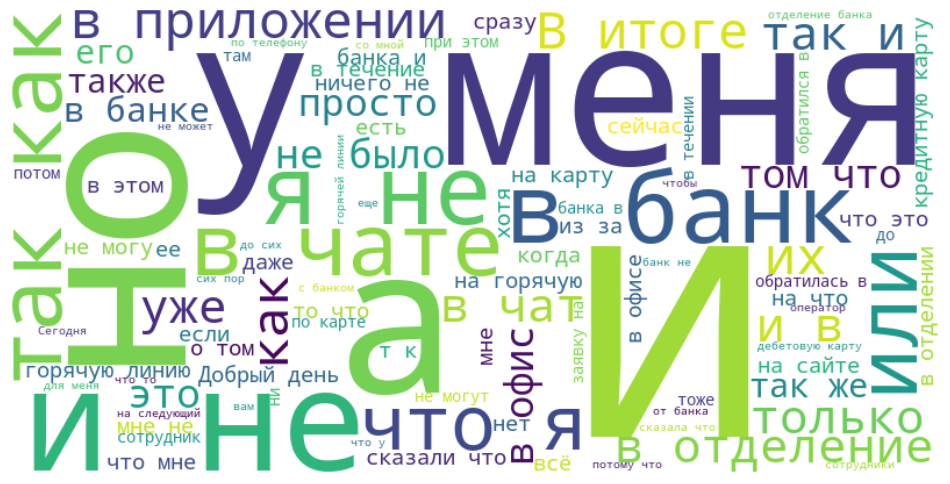

In [46]:
# импорт необходимых библиотек
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# объединение всех отзывов в одну строку
all_reviews = ' '.join(df['review'].tolist())

# удаление стоп-слов
stopwords = set(STOPWORDS)
# stopwords.update(['банк', 'банковский']) # добавление слов, которые нужно исключить из анализа

# создание объекта WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=100, width=800, height=400)

# генерация облака слов
wordcloud.generate(all_reviews)

# вывод изображения
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [45]:
df.to_csv('final_review_dataset_extended.csv')